In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import zarr
import pandas as pd
from openavalancheproject.tsai_utilities import *
from openavalancheproject.prep_ml import PrepML
import numpy as np


In [3]:
data_root = '/media/scottcha/Data2/OAPMLData/'
ml_path = data_root + '/5.MLData/'
file_label = 'ca_co_day1above_3h_large'
#file_label_1 = 'ca_co_day1above_3h_med'

In [4]:
X = zarr.open(ml_path + 'X_' + file_label + '.zarr', mode='r')

In [5]:
utils = TSAIUtilities(X, file_label)

In [6]:
feature_names = pd.read_csv(ml_path + '/FeatureLabels_' + file_label + '.csv')
feature_names = feature_names['0'].sort_values().values
#feature_names1 = pd.read_csv(ml_path + '/FeatureLabels_' + file_label_1 + '.csv')
#feature_names1 = feature_names1['0'].sort_values().values


In [7]:
filtered_feature_list = utils.filter_features(set(feature_names), only_var=False)
       

In [8]:
feature_names

array(['ABSV_1000mb_avg', 'ABSV_1000mb_max', 'ABSV_1000mb_min',
       'ABSV_100mb_avg', 'ABSV_100mb_max', 'ABSV_100mb_min',
       'ABSV_10mb_avg', 'ABSV_10mb_max', 'ABSV_10mb_min',
       'ABSV_150mb_avg', 'ABSV_150mb_max', 'ABSV_150mb_min',
       'ABSV_200mb_avg', 'ABSV_200mb_max', 'ABSV_200mb_min',
       'ABSV_20mb_avg', 'ABSV_20mb_max', 'ABSV_20mb_min',
       'ABSV_250mb_avg', 'ABSV_250mb_max', 'ABSV_250mb_min',
       'ABSV_300mb_avg', 'ABSV_300mb_max', 'ABSV_300mb_min',
       'ABSV_30mb_avg', 'ABSV_30mb_max', 'ABSV_30mb_min',
       'ABSV_350mb_avg', 'ABSV_350mb_max', 'ABSV_350mb_min',
       'ABSV_400mb_avg', 'ABSV_400mb_max', 'ABSV_400mb_min',
       'ABSV_450mb_avg', 'ABSV_450mb_max', 'ABSV_450mb_min',
       'ABSV_500mb_avg', 'ABSV_500mb_max', 'ABSV_500mb_min',
       'ABSV_50mb_avg', 'ABSV_50mb_max', 'ABSV_50mb_min',
       'ABSV_550mb_avg', 'ABSV_550mb_max', 'ABSV_550mb_min',
       'ABSV_600mb_avg', 'ABSV_600mb_max', 'ABSV_600mb_min',
       'ABSV_650mb_avg', 'ABSV_65

In [9]:
filtered_feature_indexes = [list(feature_names).index(x) for x in filtered_feature_list]

In [10]:
len(filtered_feature_indexes)

84

In [11]:
num_train_files = 60
file_list = []
for i in range(num_train_files):
    file_list.append(pd.read_parquet(ml_path + '/y_train_batch_' + str(i) + '_' + file_label + '.parquet'))

    
num_test_files = 12
for i in range(num_test_files):
    file_list.append(pd.read_parquet(ml_path + '/y_test_batch_' + str(i + num_train_files) + '_' + file_label + '.parquet'))
    #file_list.append(pd.read_parquet(ml_path + '/y_test_batch_' + str(i) + '_' + file_label + '.parquet'))
    
y_df = pd.concat(file_list).reset_index(drop=True)

In [12]:
X_small_84 = X.get_orthogonal_selection((slice(None), filtered_feature_indexes, slice(1441-8*84, 1441)))

In [13]:
X = X_small_84

In [14]:
y_df.tail()

sample  latitude  longitude  \
215995          2021-04-29 00:00:00: Front Range Zone     38.50    -105.75   
215996  2021-04-29 00:00:00: North San Juan Mountains     37.75    -106.00   
215997  2021-04-29 00:00:00: South San Juan Mountains     37.25    -108.00   
215998          2021-04-30 00:00:00: Front Range Zone     38.75    -105.50   
215999            2021-04-30 00:00:00: Steamboat Zone     40.50    -107.50   

                   UnifiedRegion         UnifiedRegionleft  Unnamed: 0  \
215995          Front Range Zone          Front Range Zone     27375.0   
215996  North San Juan Mountains  North San Juan Mountains     27376.0   
215997  South San Juan Mountains  South San Juan Mountains     27379.0   
215998          Front Range Zone          Front Range Zone     27387.0   
215999            Steamboat Zone            Steamboat Zone     27386.0   

       BottomLineSummary Cornices_Likelihood Cornices_MaximumSize  \
215995              None             no-data              no-data   
215996              None             no-data              no-data   
215997              None             no-data              no-data   
215998              None             no-data              no-data   
215999              None             no-data              no-data   

       Cornices_MinimumSize  ... WindSlabs_OctagonNearTreelineWest  \
215995              no-data  ...                                 0   
215996              no-data  ...                           no-data   
215997              no-data  ...                           no-data   
215998              no-data  ...                           no-data   
215999              no-data  ...                           no-data   

       image_paths image_types image_urls rose_url Day3DangerAboveTreeline  \
215995        None        None       None     None                    None   
215996        None        None       None     None                    None   
215997        None        None       None     None                    None   
215998        None        None       None     None                    None   
215999        None        None       None     None                    None   

       Day3DangerNearTreeline Day3DangerBelowTreeline parsed_date season  
215995                   None                    None  2021-04-29  20-21  
215996                   None                    None  2021-04-29  20-21  
215997                   None                    None  2021-04-29  20-21  
215998                   None                    None  2021-04-30  20-21  
215999                   None                    None  2021-04-30  20-21  

[5 rows x 305 columns]

In [15]:
#y_df1.tail()

In [16]:
y_df.shape

(216000, 305)

In [17]:
y_df.reset_index(inplace=True)

In [18]:
t = y_df[y_df['UnifiedRegion']=='Northwest Coastal']
t = t[t['parsed_date'] == np.datetime64('2020-12-17')].sort_values(['latitude', 'longitude'])

In [19]:
t

index                                  sample  latitude  longitude  \
183278  183278  2020-12-17 00:00:00: Northwest Coastal      53.5    -131.75   
210237  210237  2020-12-17 00:00:00: Northwest Coastal      53.5    -131.00   
189281  189281  2020-12-17 00:00:00: Northwest Coastal      53.5    -130.50   
208791  208791  2020-12-17 00:00:00: Northwest Coastal      53.5    -130.25   
187756  187756  2020-12-17 00:00:00: Northwest Coastal      53.5    -129.50   
...        ...                                     ...       ...        ...   
214753  214753  2020-12-17 00:00:00: Northwest Coastal      58.0    -129.75   
193793  193793  2020-12-17 00:00:00: Northwest Coastal      58.0    -129.50   
180288  180288  2020-12-17 00:00:00: Northwest Coastal      58.0    -129.00   
198284  198284  2020-12-17 00:00:00: Northwest Coastal      58.0    -128.75   
207270  207270  2020-12-17 00:00:00: Northwest Coastal      58.0    -128.00   

            UnifiedRegion  UnifiedRegionleft  Unnamed: 0  \
183278  Northwest Coastal  Northwest Coastal     32496.0   
210237  Northwest Coastal  Northwest Coastal     32496.0   
189281  Northwest Coastal  Northwest Coastal     32496.0   
208791  Northwest Coastal  Northwest Coastal     32496.0   
187756  Northwest Coastal  Northwest Coastal     32496.0   
...                   ...                ...         ...   
214753  Northwest Coastal  Northwest Coastal     32496.0   
193793  Northwest Coastal  Northwest Coastal     32496.0   
180288  Northwest Coastal  Northwest Coastal     32496.0   
198284  Northwest Coastal  Northwest Coastal     32496.0   
207270  Northwest Coastal  Northwest Coastal     32496.0   

                                                                                                                                                                                                                                                      BottomLineSummary  \
183278  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
210237  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
189281  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
208791  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
187756  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
...                                                                                                                                                                                                                                                                 ...   
214753  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during periods of heavy loading from new snow and strong winds.&nbsp;</p>   
193793  <p>Another storm hits the region and storm slabs will likely be reactive  they may step down to deeper weak layers initiating large to very large avalanches. Avoid avalanche terrain during period

In [20]:
#y_df1.shape

In [21]:
#merged_y = y_df.drop_duplicates(inplace=False).reset_index().merge(y_df1.reset_index(), on=['sample', 'latitude', 'longitude'], how='inner')

In [22]:
#merged_y['Day1DangerAboveTreeline_x']

In [23]:
#merged_y[['Day1DangerAboveTreeline_x', 'Day1DangerAboveTreeline_y', 'index_x', 'index_y']]

In [24]:
#X_small = X.get_orthogonal_selection(([0,1,209997],slice(None) , slice(None)))

In [25]:
#X1_small = X1.get_orthogonal_selection(([0,1,59997], slice(None), slice(None)))

In [26]:
#X_small.shape

In [27]:
#X1_small.shape

In [30]:
index = list(filtered_feature_list).index('SNOD_surface_avg')#'APCP_surface_sum')
#index1 = list(feature_names1).index('UGRD_10maboveground_avg')
sample = 210237

In [35]:
y_df.iloc[210237]

index                                                      210237
sample                     2020-12-17 00:00:00: Northwest Coastal
latitude                                                     53.5
longitude                                                  -131.0
UnifiedRegion                                   Northwest Coastal
                                            ...                  
Day3DangerAboveTreeline                                      High
Day3DangerNearTreeline                                       High
Day3DangerBelowTreeline                              Considerable
parsed_date                                   2020-12-17 00:00:00
season                                                      20-21
Name: 210237, Length: 306, dtype: object

<AxesSubplot:>

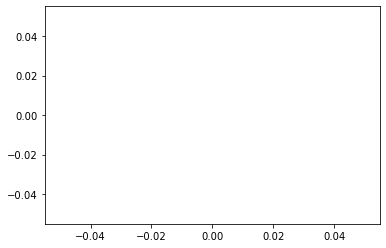

In [31]:
pd.Series(X[sample][index]).plot()

In [43]:
nans = np.isnan(X[:,index,:]).all(axis=1)

In [37]:
#TODO why is snowdepth all nan on these?

In [44]:
np.count_nonzero(nans)

8476

In [103]:
tmp = ([a[1]['UnifiedRegion'] + ', ' + str(a[1]['parsed_date']) + ', ' + str(a[1]['latitude']) + ', ' + str(a[1]['longitude']) for a in y_df.iloc[np.where(nans)].iterrows()]# if a[1]['latitude'] == 53.5 and a[1]['longitude']==-129.0])
tmp.sort()
tmp

['Northwest Coastal, 2015-12-03 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2015-12-09 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2015-12-21 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2015-12-27 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2015-12-30 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-02 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-05 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-09 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-15 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-22 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-29 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-30 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-01-30 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-02-06 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-02-06 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-03-03 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-03-10 00:00:00, 53.5, -129.0',
 'Northwest Coastal, 2016-12-03

In [52]:
y_df.iloc[np.where(nans)][['UnifiedRegion', 'season', 'parsed_date']].groupby(['UnifiedRegion', 'season']).count()

parsed_date
UnifiedRegion            season             
Northwest Coastal        15-16          1431
                         16-17          1396
                         19-20           792
                         20-21          1462
Sangre de Cristo Range   19-20            89
Sea To Sky               15-16           450
                         16-17           430
                         19-20           187
                         20-21           382
South Coast              15-16           308
                         16-17           376
                         19-20           202
                         20-21           353
South Coast Inland       16-17           164
                         19-20            75
                         20-21           177
South San Juan Mountains 19-20           202

In [1]:
import xarray as xr
import numpy as np

In [7]:
txr = xr.open_mfdataset('/media/scottcha/Data2/OAPMLData/1.RawWeatherData/gfs/15-16/Canada/gfs.0p25.*.nc', combine='nested', concat_dim='time', parallel=False)

KeyboardInterrupt: 

In [8]:
filtered_df = xr.open_mfdataset('/media/scottcha/Data2/OAPMLData/3.GFSFiltered1xInterpolation3h/15-16/Region_Northwest Coastal_201512*.nc',combine='nested', concat_dim='time', parallel=False)

In [3]:
foo = xr.open_dataset('/media/scottcha/Data2/OAPMLData/3.GFSFiltered1xInterpolation3h/15-16/Region_Northwest Coastal_20151227.nc')

In [10]:
filtered_df

<xarray.Dataset>
Dimensions:                                          (latitude: 19, longitude: 16, time: 248)
Coordinates:
  * longitude                                        (longitude) float64 -131.8 ... -128.0
  * latitude                                         (latitude) float64 53.5 ... 58.0
  * time                                             (time) datetime64[ns] 2015-12-01T03:00:00 ... 2016-01-01
Data variables:
    UGRD_localleveltype2200_min                      (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    VGRD_localleveltype2200_min                      (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    var0_2_224_localleveltype2200_min                (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    GUST_surface_min                                 (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    HGT_10mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    TMP_10mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    RH_10mb_min                                      (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    UGRD_10mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    VGRD_10mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    ABSV_10mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    var0_14_192_10mb_min                             (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    HGT_20mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    TMP_20mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    RH_20mb_min                                      (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    UGRD_20mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    VGRD_20mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    ABSV_20mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    var0_14_192_20mb_min                             (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    HGT_30mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    TMP_30mb_min                                     (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    RH_30mb_min                                      (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    UGRD_30mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    VGRD_30mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    ABSV_30mb_min                                    (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    var0_14_192_30mb_min                             (time, latitude, longitude) float32 dask.array<chunksize=(8, 19, 16), meta=np.ndarray>
    HGT_50mb_min                                     (time, latitude, lon

In [4]:
foo.sel(latitude=53.5, longitude=-129.0)['SNOD_surface_avg'].values

array([0.12, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13], dtype=float32)

In [20]:
filtered_df.sel(latitude=53.5, longitude=-129.0)['UGRD_30M0mbaboveground_max'].values

array([-1.76, -1.96, -1.51, -1.9 , -1.49, -1.68, -0.4 , -1.67, -1.84,
       -1.38,  2.02,  0.8 , -1.81, -1.85, -2.25, -2.22, -1.72, -2.08,
       -2.25, -2.23, -2.24, -1.85, -1.63, -1.43, -0.96, -1.59, -1.69,
       -2.05, -2.26, -2.06, -0.15,  1.77, -0.48, -1.23, -2.24, -3.04,
       -2.93, -1.81, -2.48, -3.06, -2.42, -1.72, -1.66, -2.31, -4.04,
       -2.81, -2.4 , -1.83, -1.37, -0.78,  0.29, -1.65, -1.55, -1.44,
       -1.16, -1.62, -2.09, -2.08, -2.45, -3.29, -2.92, -1.35,  2.29,
        1.69, -1.45, -2.05, -1.95, -2.49, -2.28, -0.76,  2.58,  0.9 ,
       -1.72, -1.73, -2.84, -3.78, -4.14, -4.01, -3.77, -3.62, -3.33,
       -2.35, -2.2 , -2.08, -2.13, -1.99, -0.96, -0.01,  0.52, -0.51,
       -1.27, -1.61, -2.41, -2.91, -3.22, -3.76, -2.71, -2.37, -2.17,
       -0.93, -0.14,  0.7 ,  0.79,  0.85,  0.54, -0.18, -0.54, -0.9 ,
       -1.14, -1.41, -1.01, -1.67, -1.13, -0.64,  1.46,  0.5 ,  0.19,
        0.52,  0.47,  0.5 , -1.02, -1.67, -2.01, -1.87, -2.17, -2.22,
       -2.08, -2.23,

In [ ]:
#TODO: we seems to have valuesin the nc file which aren't makint their way to teh final dataset, need 
#to figure out why?

In [3]:
resampled_ds = txr
resampled_ds = resampled_ds.resample(time='3H')

/home/scottcha/src/xarray/xarray/core/common.py:1034: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


In [4]:
means = resampled_ds.mean()

In [7]:
means['SNOD_surface'].sel(latitude=53.5, longitude=-129.0).values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.02,
 0.03,
 0.03,
 0.04,
 0.05,
 0.05,
 0.04,
 0.01,
 0.01,
 0.01,
 0.01,
 0.05,
 0.09,
 0.07,
 0.05,
 0.0,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.04,
 0.05,
 0.04,
 0.06,
 0.07,
 0.09,
 0.1,
 0.1,
 0.09,
 0.09,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.0,
 0.0,
 0.01,
 0.02,
 0.05,
 0.1,
 0.18,
 0.1,
 0.02,
 0.02,
 0.02,
 0.03,
 0.04,
 0.05,
 0.05,
 0.05,
 0.02,
 0.02,
 0.02,
 0.03,
 0.03,
 0.06,
 0.05,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.

In [24]:
txr.sel(latitude=53.5, longitude=-129.0)

<xarray.Dataset>
Dimensions:                                      (time: 248)
Coordinates:
    latitude                                     float64 53.5
    longitude                                    float64 -129.0
  * time                                         (time) datetime64[ns] 2015-1...
Data variables: (12/326)
    UGRD_localleveltype2200                      (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    VGRD_localleveltype2200                      (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    var0_2_224_localleveltype2200                (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GUST_surface                                 (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    HGT_10mb                                     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    TMP_10mb                                     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                                           ...
    TMP_PV_EQ_M2147D48_Km_2_kg_s_surface         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    HGT_PV_EQ_M2147D48_Km_2_kg_s_surface         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PRES_PV_EQ_M2147D48_Km_2_kg_s_surface        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    var0_2_192_PV_EQ_M2147D48_Km_2_kg_s_surface  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PRMSL_meansealevel                           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    var0_3_193_500mb                             (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0

In [21]:
interpolate = 1 
data_root = '/media/scottcha/E1/Data/OAPMLData/'
output_root = '/media/scottcha/Data2/OAPMLData/'
nc_root = '/media/scottcha/Data2/OAPMLData/'
pml = PrepML(data_root, output_root, nc_root = nc_root, interpolate=interpolate, resample_length='3H', date_start='2015-11-01', date_end='2021-04-30', date_train_test_cutoff='2020-11-01')


NameError: name 'PrepML' is not defined

In [18]:
def is_equal(a, b):
    return np.array_equiv(np.nan_to_num(a),np.nan_to_num(b))

In [19]:
num_files_to_validate = 20
y_to_validate = y_df.sample(n=num_files_to_validate)
X_to_validate = X
features = feature_names

In [20]:
for r in y_to_validate.iterrows():
    print('index ' + str(i))
    i = r[0]
    r = r[1]
    
    test_region = r['UnifiedRegion']
    test_lat = r['latitude']
    test_lon = r['longitude']
    test_lookback = 84
    test_date = r['parsed_date']
    print('Sample: ' + r['sample'])
    data = pml.get_data_zarr(test_region, lat=test_lat, lon=test_lon, lookback_days=test_lookback, date=test_date, variables=filtered_feature_list)
    data = data.sortby('variable').astype(np.float32)
    data2 = X_to_validate[i]
    assert is_equal(data.vars.values[:,:-1], data2)

index 11
Sample: 2021-02-13 00:00:00: Cariboos


AssertionError: 

In [37]:
data.vars

<xarray.DataArray 'vars' (variable: 84, time: 673)>
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.6532001e+02,  2.6539999e+02,  2.6429999e+02, ...,
         2.5270000e+02,  2.5870001e+02,  2.6039999e+02],
       ...,
       [ 1.4100000e-01,  3.1999999e-01,  5.1999998e-01, ...,
         4.1000001e-02, -1.5000000e-02,  2.0000000e-02],
       [ 2.3999999e-01,  2.4800000e-01,  2.4480000e-01, ...,
         4.8000004e-02,  4.6399999e-02,  4.4800002e-02],
       [ 4.1000000e+01,  3.4000000e+01,  3.4000000e+01, ...,
         5.6000000e+01,  5.6000000e+01,  5.6000000e+01]], dtype=float32)
Coordinates:
    latitude   float64 52.0
    longitude  float64 -120.5
  * variable   (variable) <U47 'ACPCP_surface_sum' ... 'WEASD_surface_avg'
Dimensions without coordinates: time

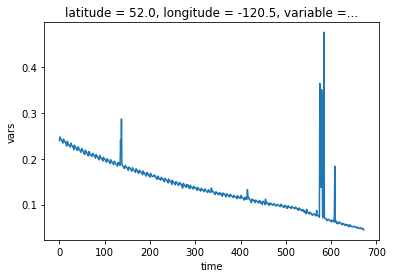

In [38]:
data.sel(variable='WATR_surface_sum').vars.plot()

In [22]:
import xarray as xr

In [39]:
season = '15-16'
state_path = 'Canada'
t = '201601*'
precip_dataset_path =  nc_root + '/1.RawWeatherData/gfs/' + season + '/' + state_path + 'AccumulationGrib/'
file_pattern2 = '00.f0[0-2]*.nc'
path = precip_dataset_path + 'gfs.0p25.' + t + file_pattern2
precip_ds = xr.open_mfdataset(path, combine='nested', concat_dim='time', parallel=False)
precip_ds.sel(latitude=58.0, longitude=-128.75).APCP_surface.plot()

AttributeError: 'Dataset' object has no attribute 'WATR_surface_sum'

In [40]:
season = '19-20'
state_path = 'ColoradoUtah'
t = '202001*'
precip_dataset_path =  nc_root + '/1.RawWeatherData/gfs/' + season + '/' + state_path + 'AccumulationGrib/'
file_pattern2 = '00.f0[0-2]*.nc'
path = precip_dataset_path + 'gfs.0p25.' + t + file_pattern2
precip_ds = xr.open_mfdataset(path, combine='nested', concat_dim='time', parallel=False)
precip_ds.isel(latitude=0, longitude=0).APCP_surface.plot()


AttributeError: 'Dataset' object has no attribute 'WATR_surface_sum'

In [5]:
df = xr.open_mfdataset('/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/*.grib2', combine='nested', concat_dim='time', parallel=False, engine='cfgrib')

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010100.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010212.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010400.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010512.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010512.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010512.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010518.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010700.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010700.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010706.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010706.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010812.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010818.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010818.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016010818.f009.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011006.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011006.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011006.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011006.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011112.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011118.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011118.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011118.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011118.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011118.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011306.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011418.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011606.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011718.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011718.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011718.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011718.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011718.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011800.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011906.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011906.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011906.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011906.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011912.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016011912.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012018.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012018.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012100.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012100.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012206.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012212.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012212.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012212.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012400.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012512.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012700.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012812.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012812.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012812.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016012818.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013000.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013000.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013006.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2016010100.f003-25.2016013100.f024.grib2/gfs.0p25.2016013006.f006.grib2.923a8.idx' incompat

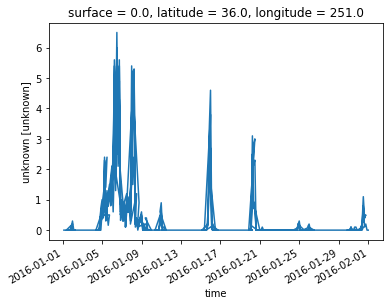

In [6]:
df.isel(latitude=0, longitude=0).unknown.plot(x='valid_time')

In [7]:
df2 = xr.open_mfdataset('/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/*.grib2', combine='nested', concat_dim='time', parallel=False, engine='cfgrib')

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010100.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010212.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010400.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010512.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010512.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010512.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010518.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010700.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010700.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010706.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010706.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010812.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010818.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010818.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017010818.f009.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011006.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011006.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011006.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011006.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011112.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011118.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011118.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011118.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011118.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011118.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011306.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011418.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011606.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011718.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011718.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011718.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011718.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011718.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011800.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011906.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011906.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011906.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011906.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011912.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017011912.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012018.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012018.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012018.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012100.f009.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012206.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012206.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012212.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012212.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012318.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012400.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012400.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012400.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012512.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012700.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017012812.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013000.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013000.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013000.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2017010100.f003-25.2017013100.f024.grib2/gfs.0p25.2017013006.f003.grib2.923a8.idx' incompat

In [8]:
np.unique(df2.isel(latitude=0, longitude=0).unknown)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1 , 0.11,
       0.13, 0.14, 0.15, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.24, 0.27, 0.29,
       0.3 , 0.31, 0.32, 0.33, 0.35, 0.38, 0.39, 0.4 , 0.44, 0.45, 0.46,
       0.48, 0.49, 0.5 , 0.52, 0.53, 0.57, 0.58, 0.6 , 0.63, 0.66, 0.68,
       0.7 , 0.71, 0.72, 0.73, 0.76, 0.8 , 0.83, 0.84, 0.86, 0.9 , 0.93,
       1.  , 1.02, 1.04, 1.05, 1.1 , 1.12, 1.14, 1.18, 1.19, 1.2 , 1.21,
       1.24, 1.25, 1.26, 1.27, 1.29, 1.3 , 1.31, 1.32, 1.4 , 1.41, 1.46,
       1.48, 1.5 , 1.54, 1.6 , 1.66, 1.68, 1.7 , 1.73, 1.75, 1.77, 1.8 ,
       1.81, 1.83, 1.84, 1.86, 1.88, 1.9 , 1.98, 2.  , 2.05, 2.07, 2.1 ,
       2.13, 2.16, 2.2 , 2.27, 2.3 , 2.4 , 2.43, 2.5 , 2.53, 2.57, 2.6 ,
       2.7 , 2.76, 2.8 , 2.9 , 2.94, 2.96, 3.13, 3.2 , 3.4 , 3.41, 3.45,
       3.5 , 3.69, 3.7 , 3.8 , 3.9 , 4.  , 4.1 , 4.2 , 4.3 , 4.4 , 4.59,
       4.8 , 5.16, 5.4 , 5.72, 5.89, 7.1 , 7.13, 8.23, 8.4 ],
      dtype=float32)

In [9]:
df3 = xr.open_mfdataset('/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/*.grib2', combine='nested', concat_dim='time', parallel=False, engine='cfgrib')

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010100.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010212.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010400.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010512.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010512.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010512.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010518.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010700.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010700.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010706.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010706.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010812.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010818.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010818.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018010818.f009.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011006.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011006.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011006.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011006.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011112.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011118.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011118.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011118.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011118.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011118.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011306.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011418.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011606.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011718.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011718.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011718.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011718.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011718.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011800.f003.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011906.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011906.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011906.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011906.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011912.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011912.f006.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012018.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012018.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012018.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012100.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012100.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012100.f009.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012206.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012206.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012212.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012212.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012212.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012212.f012.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012318.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012400.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012400.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012400.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012400.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012400.f015.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f003.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012512.f018.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f006.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012700.f021.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f009.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018012812.f024.grib2.923a8.idx' incompat

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013000.f012.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013000.f015.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013000.f018.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013000.f021.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013000.f024.grib2.923a8.idx' incompatible with GRIB file
Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018013006.f003.grib2.923a8.idx' incompat

In [10]:
np.unique(df3.isel(latitude=0, longitude=0).unknown)

array([0., 1., 2., 3., 4., 5.], dtype=float32)

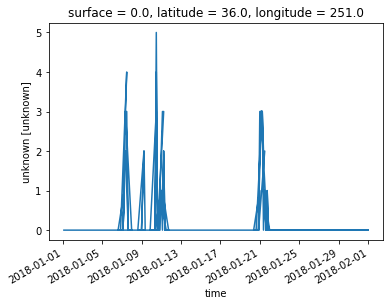

In [11]:
df3.isel(latitude=0, longitude=0).unknown.plot(x='valid_time')

In [42]:
df4 = xr.open_mfdataset('/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011000.f012.grib2', combine='nested', concat_dim='time', parallel=False, engine='cfgrib')

Ignoring index file '/media/scottcha/E1/Data/Temp/gfs.0p25.2018010100.f003-25.2018013100.f024.grib2/gfs.0p25.2018011000.f012.grib2.923a8.idx' incompatible with GRIB file


In [43]:
df4.unknown.values

array([[[4.]]], dtype=float32)

TypeError: hist() got multiple values for argument 'x'

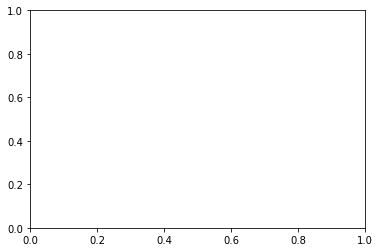

In [44]:
df4.isel(latitude=0, longitude=0).unknown.plot(x='valid_time')

In [16]:
df4 = xr.open_mfdataset('/media/scottcha/E1/Data/OAPMLData/1.RawWeatherData/ColoradoUtahAccumulationGrib2/*.nc',combine='nested', concat_dim='time', parallel=False,)

In [17]:
df4

<xarray.Dataset>
Dimensions:                                           (latitude: 11, longitude: 11, time: 63)
Coordinates:
  * latitude                                          (latitude) float64 36.0...
  * longitude                                         (longitude) float64 -10...
  * time                                              (time) datetime64[ns] 2...
Data variables: (12/580)
    CLMR_1hybridlevel                                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    ICMR_1hybridlevel                                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    RWMR_1hybridlevel                                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    SNMR_1hybridlevel                                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    GRLE_1hybridlevel                                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    REFC_entireatmosphere                             (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    ...                                                ...
    HGT_PV_EQ_M2eM06_Km_2_kg_s_surface                (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    PRES_PV_EQ_M2eM06_Km_2_kg_s_surface               (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    VWSH_PV_EQ_M2eM06_Km_2_kg_s_surface               (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    PRMSL_meansealevel                                (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    N5WAVH_500mb                                      (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    LANDN_surface                                     (time, latitude, longitude) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0

In [26]:
df4.APCP_surface.values

array([[[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
    

In [14]:
df5 = xr.open_dataset('/media/scottcha/E1/Data/OAPMLData/1.RawWeatherData/ColoradoUtahAccumulationGrib2/gfs_4_20201101_0000_000.grb2.nc')

In [15]:
df5

<xarray.Dataset>
Dimensions:                                           (latitude: 11, longitude: 11, time: 1)
Coordinates:
  * latitude                                          (latitude) float64 36.0...
  * longitude                                         (longitude) float64 -10...
  * time                                              (time) datetime64[ns] 2...
Data variables: (12/522)
    CLMR_1hybridlevel                                 (time, latitude, longitude) float32 ...
    ICMR_1hybridlevel                                 (time, latitude, longitude) float32 ...
    RWMR_1hybridlevel                                 (time, latitude, longitude) float32 ...
    SNMR_1hybridlevel                                 (time, latitude, longitude) float32 ...
    GRLE_1hybridlevel                                 (time, latitude, longitude) float32 ...
    REFC_entireatmosphere                             (time, latitude, longitude) float32 ...
    ...                                                ...
    HGT_PV_EQ_M2eM06_Km_2_kg_s_surface                (time, latitude, longitude) float32 ...
    PRES_PV_EQ_M2eM06_Km_2_kg_s_surface               (time, latitude, longitude) float32 ...
    VWSH_PV_EQ_M2eM06_Km_2_kg_s_surface               (time, latitude, longitude) float32 ...
    PRMSL_meansealevel                                (time, latitude, longitude) float32 ...
    N5WAVH_500mb                                      (time, latitude, longitude) float32 ...
    LANDN_surface                                     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0

In [68]:
is_equal(data.vars.values[0][:-1], data2[0])

True

In [64]:
data2[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [65]:
data.vars.values[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [123]:
for i in range(data2.shape[0]):
    if not is_equal(data2[i], data.vars.values[i]):
        print('index ' + str(i))
        print(data2[i])
        print(data.vars.values[i])

index 0
[    nan     nan     nan ... 6.3e-05 4.1e-05 3.3e-05]
[    nan     nan     nan ... 5.9e-05 7.4e-05 5.1e-05]
index 1
[     nan      nan      nan ... 0.0002   0.000334 0.000125]
[    nan     nan     nan ... 5.5e-05 4.5e-05 6.0e-05]
index 2
[     nan      nan      nan ... 0.000195 0.00034  0.000119]
[     nan      nan      nan ... -1.8e-05  3.9e-05  5.9e-05]
index 17
[    nan     nan     nan ... 3163.2  2794.56 2410.56]
[     nan      nan      nan ... 20556.31 20537.69 20550.16]
index 18
[     nan      nan      nan ... 20556.31 20537.69 20550.16]
[     nan      nan      nan ... 1036.759 1046.123 1084.181]
index 19
[     nan      nan      nan ... 2014.906 2018.037 2047.44 ]
[    nan     nan     nan ... 363.077 374.401 416.9  ]
index 31
[nan nan nan ... 4.9 6.3 9.1]
[ nan  nan  nan ... 31.1 47.5 55. ]
index 34
[ nan  nan  nan ... 50.8 80.3 97. ]
[nan nan nan ... 6.5 5.8 5.2]
index 35
[nan nan nan ... 27. 26. 22.]
[ nan  nan  nan ... 50.8 80.3 97. ]
index 41
[nan nan nan ... nan nan 

In [15]:
X[8000][filtered_feature_indexes, :].shape

(72, 1441)

In [19]:
#Check for empty datasets
t = [np.all(X[i][filtered_feature_indexes,:]==0) for i in range(0,X.shape[0])]

In [20]:
np.sum(t)

1901

In [31]:
y_df[y_df['season']=='20-21'].index

Int64Index([180000, 180001, 180002, 180003, 180004, 180005, 180006, 180007,
            180008, 180009,
            ...
            212990, 212991, 212992, 212993, 212994, 212995, 212996, 212997,
            212998, 212999],
           dtype='int64', length=33000)

In [28]:
list(np.where(t)[0])

[214099,
 214100,
 214101,
 214102,
 214103,
 214104,
 214105,
 214106,
 214107,
 214108,
 214109,
 214110,
 214111,
 214112,
 214113,
 214114,
 214115,
 214116,
 214117,
 214118,
 214119,
 214120,
 214121,
 214122,
 214123,
 214124,
 214125,
 214126,
 214127,
 214128,
 214129,
 214130,
 214131,
 214132,
 214133,
 214134,
 214135,
 214136,
 214137,
 214138,
 214139,
 214140,
 214141,
 214142,
 214143,
 214144,
 214145,
 214146,
 214147,
 214148,
 214149,
 214150,
 214151,
 214152,
 214153,
 214154,
 214155,
 214156,
 214157,
 214158,
 214159,
 214160,
 214161,
 214162,
 214163,
 214164,
 214165,
 214166,
 214167,
 214168,
 214169,
 214170,
 214171,
 214172,
 214173,
 214174,
 214175,
 214176,
 214177,
 214178,
 214179,
 214180,
 214181,
 214182,
 214183,
 214184,
 214185,
 214186,
 214187,
 214188,
 214189,
 214190,
 214191,
 214192,
 214193,
 214194,
 214195,
 214196,
 214197,
 214198,
 214199,
 214200,
 214201,
 214202,
 214203,
 214204,
 214205,
 214206,
 214207,
 214208,
 214209,
 

RangeIndex(start=0, stop=213000, step=1)

In [26]:
y_df.iloc[np.where(t)[0]]

IndexError: positional indexers are out-of-bounds